##### Outliers and Impact on Machine Learning!!

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.Age.isnull().sum()

177

C:\Users\bikas\AppData\Local\Temp\ipykernel_6856\3745215003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age.dropna())


<Axes: xlabel='Age', ylabel='Density'>

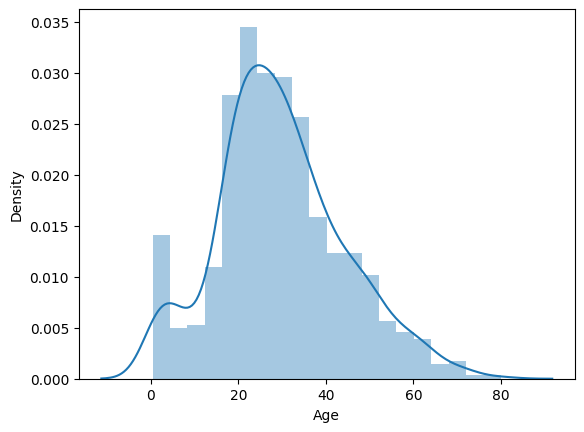

In [3]:
import seaborn as sns
sns.distplot(df.Age.dropna())


C:\Users\bikas\AppData\Local\Temp\ipykernel_6856\490393537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age.fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

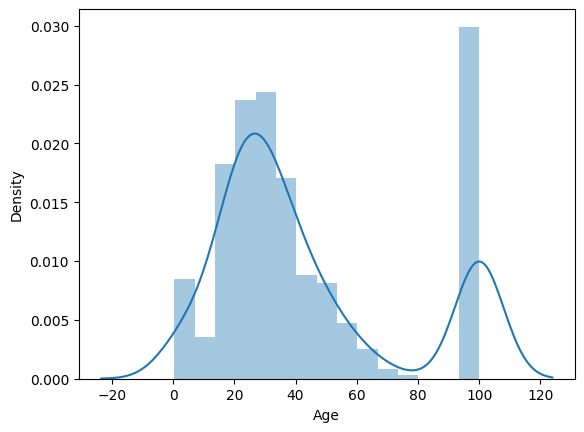

In [4]:
sns.distplot(df.Age.fillna(100))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

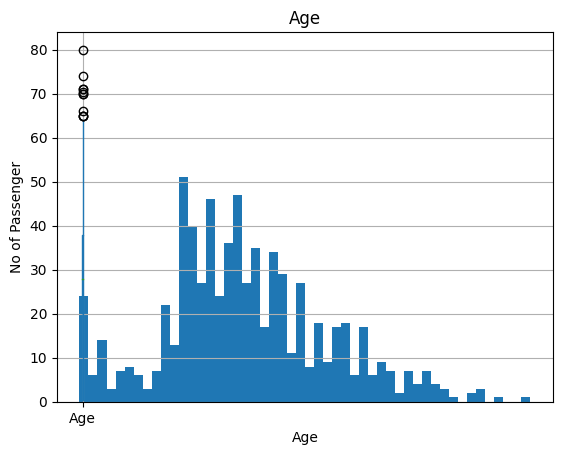

In [5]:
## Gaussian Distribution
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')
figure = df.boxplot(column ='Age')
df.Age.describe()

In [6]:
# Assuming Age follows a Gaussian Distribution we will calculate the boundaries which differetiates the outliers

In [7]:
df.Age.mean()

29.69911764705882

In [8]:
upper_boundary = df.Age.mean()+3*df.Age.std()
lower_boundary = df.Age.mean()-3*df.Age.std()
print(lower_boundary)
print(upper_boundary)
print(df.Age.mean())

-13.880374349943303
73.27860964406094
29.69911764705882


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
import numpy as np
mode = df.Cabin.mode()
np.random.choice(mode)

'G6'

In [17]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [20]:
df.Cabin.fillna(df.Cabin.mode())

0      B96 B98
1          C85
2           G6
3         C123
4          NaN
        ...   
886        NaN
887        B42
888        NaN
889       C148
890        NaN
Name: Cabin, Length: 891, dtype: object

In [18]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [23]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [33]:
df.Cabin = np.where(df.Cabin.isnull(),'B96',df.Cabin)

In [34]:
df.Cabin.isnull().sum()

0

In [36]:
## Compute Interquantile range to calculate the boundaries
iqr = df.Age.quantile(0.75) - df.Age.quantile(0.25)
iqr

17.875

In [39]:
lower_bridge = df.Age.quantile(0.25) - (iqr*1.5)
higher_bridge = df.Age.quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(higher_bridge)

-6.6875
64.8125


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

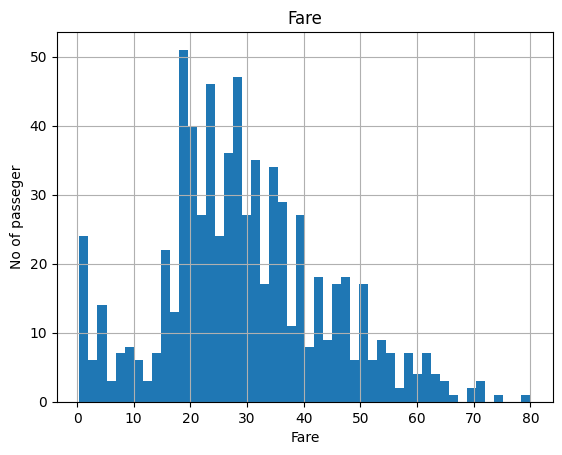

In [40]:
# feature is skewed
figure = df.Age.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passeger')
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

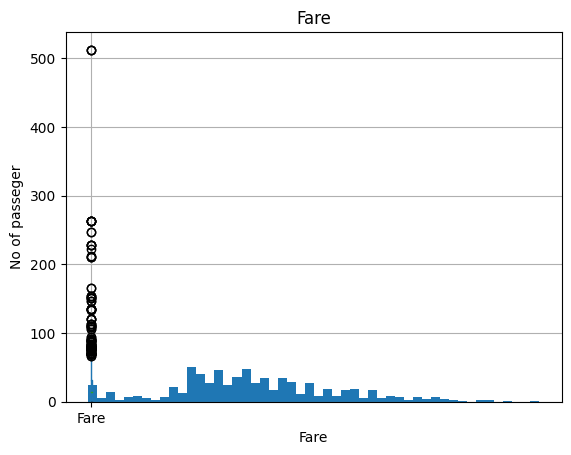

In [41]:
# feature is skewed
figure = df.Age.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passeger')
df.boxplot(column = 'Fare')
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

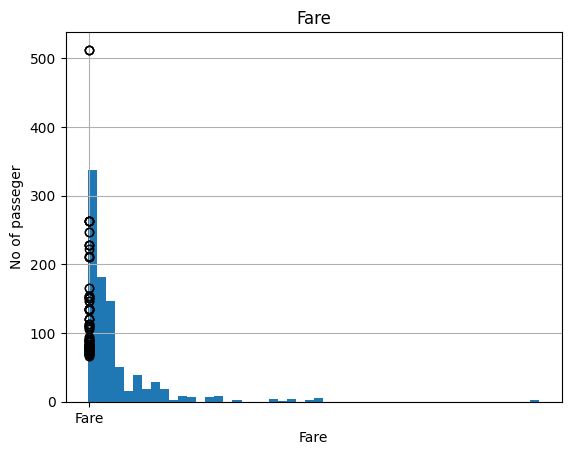

In [42]:
# feature is skewed
figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passeger')
df.boxplot(column = 'Fare')
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

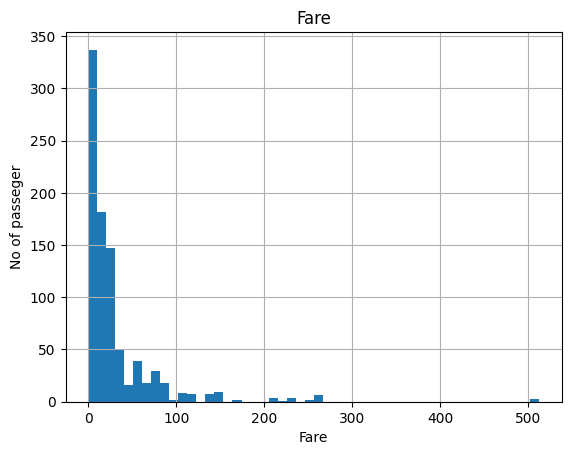

In [43]:
# feature is skewed
figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passeger')
df.Fare.describe()

In [45]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
lower_bridge = df.Fare.quantile(0.25) - IQR * 1.5
higer_bridge = df.Fare.quantile(0.75) + IQR * 1.5
print(lower_bridge)
print(higher_bridge)

-26.724
64.8125


##### Convert outliers to 73 or 100

In [46]:
data = df.copy()

In [51]:
data.loc[data['Age'] >= 73,'Age'] = 73
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,22.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,22.0,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,22.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,22.0,0,0,373450,8.0500,B96,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,B96,S
96,97,0,1,"Goldschmidt, Mr. George B",male,22.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,22.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,22.0,0,1,231919,23.0000,B96,S


In [52]:
data.loc[data['Fare']> 100, 'Fare'] = 100

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['Age','Fare']].fillna(0),data['Survived'],test_size = 3)

In [61]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score : ",accuracy_score(y_test,y_pred))
# print("Roc_Auc_Score : {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score :  0.6666666666666666
